In [4]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [7]:
import numpy as np
import pandas as pd
import datetime as dt
from sqlalchemy.ext.automap import automap_base

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from datetime import datetime, timedelta

In [9]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [21]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(f"The most recent date in the data set is {most_recent_date}")

The most recent date in the data set is ('2017-08-23',)


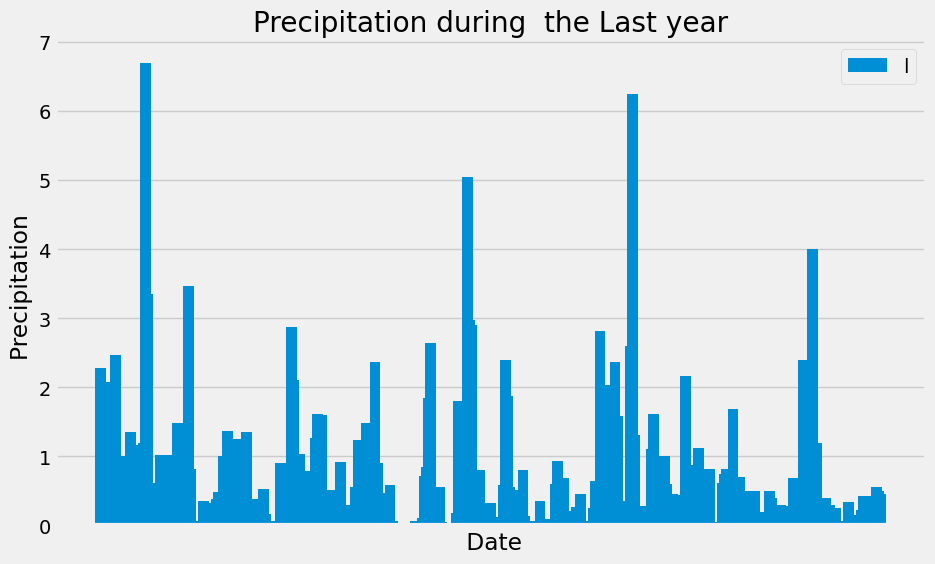

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
date = most_recent_date
# Calculate the date one year from the last date in data set.
one_year = date - timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation = pd.DataFrame(results, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation.sort_values(by='Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(10, 6))
plt.bar(precipitation['Date'], precipitation['Precipitation'], width=5, label='Precipitation')
plt.xlabel(" Date")
plt.ylabel("Precipitation ")
plt.title("Precipitation during  the Last year")
plt.xticks([])
plt.legend("last 12 months of precipitation")
plt.show()


In [54]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation['Precipitation'].describe()
summary_stats

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [61]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [65]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_active = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
station_active 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [73]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_active[0][0]
temperature_stats = session.query(
    func.min(measurement.tobs).label('lowest_temperature'),
    func.max(measurement.tobs).label('highest_temperature'),
    func.avg(measurement.tobs).label('average_temperature')
).filter(measurement.station == most_active_station).all()


lowest_temperature = temperature_stats[0].lowest_temperature
highest_temperature = temperature_stats[0].highest_temperature
average_temperature = temperature_stats[0].average_temperature

print(f"Most Active Station ID: {most_active_station_id}")
print(f"Lowest Temperature: {lowest_temperature} ")
print(f"Highest Temperature: {highest_temperature} ")
print(f"Average Temperature: {average_temperature} ")

Most Active Station ID: USC00519281
Lowest Temperature: 54.0 
Highest Temperature: 85.0 
Average Temperature: 71.66378066378067 


Text(0.5, 4.183333333333314, 'Temperature')

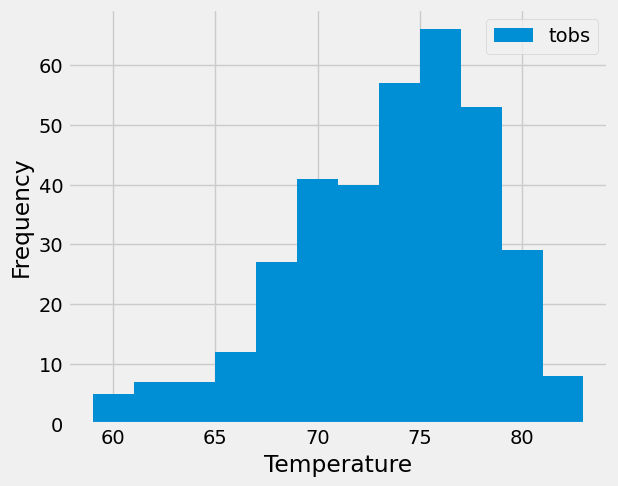

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(measurement.tobs).filter(measurement.station == most_active_station).\
    filter(measurement.date >= one_year).all()

# Convert the results to a Pandas DataFrame
temperature_df = pd.DataFrame(temperature_data, columns=['Temperature'])
print(f"text(0.5, 4.183333333333314, 'Temperature')")

# Plot 
plt.figure(figsize=(8, 6))
plt.hist(temperature_df['Temperature'], bins=12, label='Temperature Observations', alpha=0.7, color='blue')
plt.xlabel('Temperature ')
plt.ylabel('Frequency')
plt.title(f'Temperature for Station most_active_station in Last 12 Months')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Close Session

In [87]:
# Close Session
session.close()